## Observations and Insights

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

* The two most used treatmets are Capomulin and Ramicane

* Whe the mean is calculated, all treatments are use, however,  in the boxplot it is shown that Ramicane and Capomulin have outliers that can cause a not that accurate mean.

* The samples for each treatment it is not the same, this could affect the results and analysis.

* According with the mean and sem for the treatments, it coul be said, that basen on the information given,
  the tratment with better results, takin into consideration the Tumor Volumen, is Ramicane.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib as mpl
import numpy as np

#------- Format the graphics 
mpl.rcParams['font.size'] = 14

#------- Format for the floats for this work
pd.options.display.float_format = '{:,.2f}'.format
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

dataset=mouse_metadata.merge(study_results, on='Mouse ID',suffixes=('_metadata','_result'))


display(dataset.head())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

stats = dataset.groupby('Drug Regimen').describe()
mean = dataset.groupby('Drug Regimen').mean()
median = dataset.groupby('Drug Regimen').median()
variance = dataset.groupby('Drug Regimen').var()
stdeviation = dataset.groupby('Drug Regimen').std()
sem = pd.DataFrame(dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
#display(stats)

display(mean)
display(median)
display(variance)
display(stdeviation)
display(sem)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.46,19.97,21.57,40.68,0.71
Ceftamin,13.25,27.40,19.75,52.59,1.18
Infubinol,16.23,27.20,18.17,52.88,0.96
Ketapril,15.66,27.86,19.71,55.24,1.30
Naftisol,12.00,27.17,19.62,54.33,1.18
Placebo,10.73,27.93,18.67,54.03,1.44
Propriva,10.89,27.04,16.86,52.32,0.98
Ramicane,10.68,19.68,21.43,40.22,0.55
Stelasyn,12.78,27.86,19.23,54.23,0.87


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.50,20.50,20.00,41.56,0.00
Ceftamin,12.00,28.00,20.00,51.78,1.00
Infubinol,20.00,27.00,15.00,51.82,1.00
Ketapril,18.00,28.00,20.00,53.70,1.00
Naftisol,9.00,27.00,20.00,52.51,1.00
Placebo,10.00,28.00,15.00,52.29,1.00
Propriva,8.00,26.00,15.00,50.85,1.00
Ramicane,9.00,19.00,20.00,40.67,0.00
Stelasyn,14.00,28.00,20.00,52.43,1.00


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.62,7.47,206.93,24.95,0.72
Ceftamin,65.15,2.50,204.03,39.29,1.40
Infubinol,56.40,4.77,181.53,43.13,1.05
Ketapril,36.24,3.39,196.84,68.55,1.94
Naftisol,45.10,2.25,201.21,66.17,1.48
Placebo,40.38,3.38,192.95,61.17,1.79
Propriva,53.36,2.79,181.51,42.35,1.17
Ramicane,35.36,10.47,203.80,23.49,0.48
Stelasyn,63.04,2.70,191.62,59.45,0.94


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.72,2.73,14.38,4.99,0.85
Ceftamin,8.07,1.58,14.28,6.27,1.18
Infubinol,7.51,2.18,13.47,6.57,1.03
Ketapril,6.02,1.84,14.03,8.28,1.39
Naftisol,6.72,1.50,14.18,8.13,1.22
Placebo,6.35,1.84,13.89,7.82,1.34
Propriva,7.30,1.67,13.47,6.51,1.08
Ramicane,5.95,3.24,14.28,4.85,0.69
Stelasyn,7.94,1.64,13.84,7.71,0.97


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.33
Ceftamin,0.47
Infubinol,0.49
Ketapril,0.60
Naftisol,0.60
Placebo,0.58
Propriva,0.51
Ramicane,0.32
Stelasyn,0.57


## Bar plots

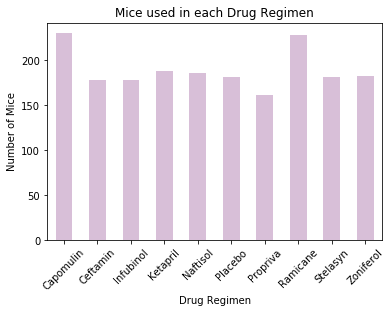

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#dataset.plot.bar(x=)

regimen=dataset.groupby('Drug Regimen')['Drug Regimen'].count()
regimen.plot.bar(rot=45, color='#D8BFD8')

#------Formatting ------

plt.title('Mice used in each Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


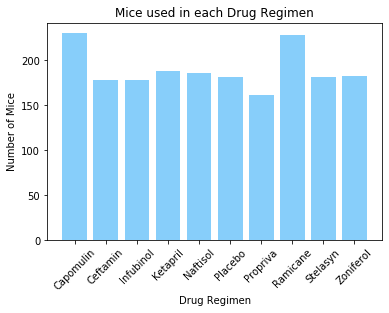

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
py_drug = pd.DataFrame(regimen)
py_drug.rename(columns={'Drug Regimen': "Number of Mice"}, inplace=True)
py_drug.reset_index(inplace=True)

plt.bar(py_drug['Drug Regimen'],py_drug['Number of Mice'], color='#87CEFA')

#------ Formatting------

plt.xticks(rotation=45)
plt.title('Mice used in each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

## Pie plots

Distribution of female versus male mice

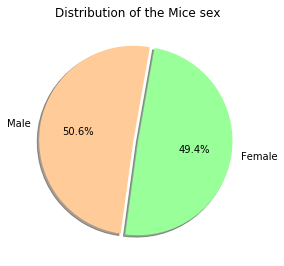

In [5]:
#Pandas
#Variables fot the pie chart
colors={'#99ff99','#ffcc99'}
explode=(0.05,0)

#------ Plotting
dataset['Sex'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(4,4)
                                       ,colors=colors,startangle=80, 
                                       explode=explode,shadow=True)
#------ Formatting
plt.axis('off')
plt.title('Distribution of the Mice sex')
plt.tight_layout()
plt.show()

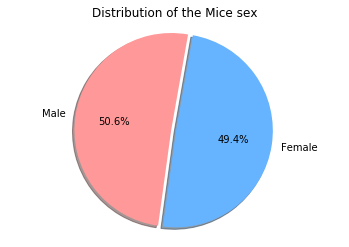

In [6]:
# Pyplot
#------ Crreating a DF with the sex of the mice
gender=(pd.DataFrame(dataset['Sex'].value_counts())).reset_index()
#------ Creating the parameters for the pie chart

labels=gender['index']
sizes=gender['Sex']
colors={'#ff9999','#66b3ff'}
explode=(0.05,0)

#------ Plotting
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',
        colors=colors,startangle=80, explode=explode,shadow=True)

#---- Formatting
plt.title('Distribution of the Mice sex')
ax1.axis('equal')

plt.show()


## Quartiles, outliers and boxplots

In order to know the final tumor volumen for each mouse for the 4 most promising treatments, is mandatory to know which this proimising treatments are:

* --> It is necessary to know the total volumen for each Drug Regimen 
* --> When we know our total volume, it it calculated the mean and standard deviation
* --> With this values calculated a range is created where the most promising traetments are located,
    after that the data is sorted (ascending).
    
   

In [7]:
finalvol = (pd.DataFrame(dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum())
           ).reset_index()
#----- mean
meanfinalvol = finalvol['Tumor Volume (mm3)'].mean()
#------ standard deviation
stdfinalvol = finalvol['Tumor Volume (mm3)'].std()
#------ limit inferior
st1 = meanfinalvol+stdfinalvol
#------ limit superior
st2 = meanfinalvol-stdfinalvol
#------ filtering data
promising = (finalvol.loc[(finalvol['Tumor Volume (mm3)'] >st2) & (finalvol['Tumor Volume (mm3)'] <st1)]).copy()
#----- setting index wit the tumor volumne and sorting it
promising.set_index('Drug Regimen',inplace=True)
promising.sort_values('Tumor Volume (mm3)', inplace = True)

display(promising)

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,"9,169.42"
Capomulin,"9,355.42"
Ceftamin,"9,361.23"
Infubinol,"9,413.49"
Zoniferol,"9,689.04"
Placebo,"9,780.08"
Stelasyn,"9,816.20"


With the 4 most promising treatments known, the volume for each mouse used in this treatment is calculated.

In [8]:
#------ Selecting the four most promising values
four = promising.reset_index().iloc[0:4,0].values.tolist()

#------ 
mice=pd.DataFrame(dataset.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].sum())
total_mouse = mice[mice.index.get_level_values(0).isin(four)]


display(total_mouse.head())


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128                  419.64
             b742                  400.84
             f966                  182.53
             g288                  419.90
             g316                  446.13

### Determine the quartiles and IQR and quantitatively and if there are any potential outliers across all four treatment regimens.

In [9]:
#---- Ramicane drug
ramicane = dataset.loc[dataset['Drug Regimen']==four[0]]

rquartiles = ramicane['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
rlowerq = round(rquartiles[0.25],2)
rupperq = round(rquartiles[0.75],2)
riqr = round(rupperq - rlowerq,2)


print("Ramicane")
print("--------------------------------------------------------------")
print(f"The lower quartile of Ramicane is: {rlowerq}")
print(f"The upper quartile of Ramicane is: {rupperq}")
print(f"The interquartile range of Ramicane is: {riqr}")
print(f"The the median of Ramicane is: {round(rquartiles[0.5],2)} ")

rlower_bound = round(rlowerq - (1.5*riqr),2)
rupper_bound = round(rupperq + (1.5*riqr),2)

print(f"Values below {rlower_bound} could be outliers.")
print(f"Values above {rupper_bound} could be outliers.")


Ramicane
--------------------------------------------------------------
The lower quartile of Ramicane is: 36.67
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.33
The the median of Ramicane is: 40.67 
Values below 24.18 could be outliers.
Values above 57.5 could be outliers.


In [10]:
#---- Capomulin drug
capomulin = dataset.loc[dataset['Drug Regimen']==four[1]]

caquartiles = capomulin['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
calowerq = round(caquartiles[0.25],2)
caupperq = round(caquartiles[0.75],2)
caiqr = round(caupperq - calowerq,2)

print("Capomulin")
print("--------------------------------------------------------------")
print(f"The lower quartile of Capomulin is: {calowerq}")
print(f"The upper quartile of Capomulin is: {caupperq}")
print(f"The interquartile range of Capomulin is: {caiqr}")
print(f"The the median of Capomulin is: {round(caquartiles[0.5],2)} ")

calower_bound = round(calowerq - (1.5*riqr),2)
caupper_bound = round(caupperq + (1.5*riqr),2)
print(f"\nValues below {calower_bound} could be outliers.")
print(f"Values above {caupper_bound} could be outliers.")


Capomulin
--------------------------------------------------------------
The lower quartile of Capomulin is: 37.69
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.31
The the median of Capomulin is: 41.56 

Values below 25.19 could be outliers.
Values above 57.5 could be outliers.


In [11]:
#---- Ceftamin drug
ceftamin = dataset.loc[dataset['Drug Regimen']==four[2]]

cequartiles = ceftamin['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
celowerq = round(cequartiles[0.25],2)
ceupperq = round(cequartiles[0.75],2)
ceiqr = round(ceupperq - celowerq,2)

print("Ceftamin")
print("--------------------------------------------------------------")
print(f"The lower quartile of Ceftamin is: {celowerq}")
print(f"The upper quartile of Ceftamin is: {ceupperq}")
print(f"The interquartile range of Ceftamin is: {ceiqr}")
print(f"The the median of Ceftamin is: {round(cequartiles[0.5],2)} ")

celower_bound = round(celowerq - (1.5*ceiqr),2)
ceupper_bound = round(ceupperq + (1.5*ceiqr),2)
print(f"\nValues below {celower_bound} could be outliers.")
print(f"Values above {ceupper_bound} could be outliers.")

Ceftamin
--------------------------------------------------------------
The lower quartile of Ceftamin is: 47.21
The upper quartile of Ceftamin is: 56.8
The interquartile range of Ceftamin is: 9.59
The the median of Ceftamin is: 51.78 

Values below 32.83 could be outliers.
Values above 71.18 could be outliers.


In [12]:
#---- Infubinol drug
infubinol = dataset.loc[dataset['Drug Regimen']==four[3]]

inquartiles = infubinol['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
inlowerq = round(inquartiles[0.25],2)
inupperq = round(inquartiles[0.75],2)
iniqr = round(inupperq - inlowerq,2)

print("Infubinol")
print("--------------------------------------------------------------")
print(f"The lower quartile of Ceftamin is: {inlowerq}")
print(f"The upper quartile of Ceftamin is: {inupperq}")
print(f"The interquartile range of Ceftamin is: {iniqr}")
print(f"The the median of Ceftamin is: {round(inquartiles[0.5],2)} ")

inlower_bound = round(inlowerq - (1.5*iniqr),2)
inupper_bound = round(inupperq + (1.5*iniqr),2)
print(f"\nValues below {inlower_bound} could be outliers.")
print(f"Values above {inupper_bound} could be outliers.")

Infubinol
--------------------------------------------------------------
The lower quartile of Ceftamin is: 47.31
The upper quartile of Ceftamin is: 57.31
The interquartile range of Ceftamin is: 10.0
The the median of Ceftamin is: 51.82 

Values below 32.31 could be outliers.
Values above 72.31 could be outliers.


### Box and whisker plot of the final tumor volume for all four treatment regimens

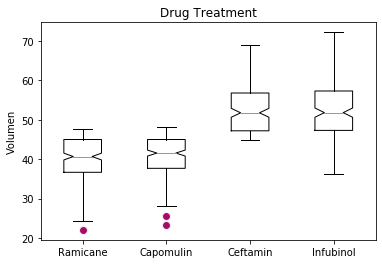

In [13]:
#------ Defining the variables to use in the boxplot
rami = ramicane['Tumor Volume (mm3)']
capo = capomulin['Tumor Volume (mm3)']
cefta = ceftamin['Tumor Volume (mm3)']
infu = infubinol['Tumor Volume (mm3)']

#------ 
fig1, ax5 = plt.subplots()
ax5.set_title('Drug Treatment')
ax5.set_ylabel('Volumen')

flierprops = dict(marker='o', markerfacecolor='#A30E64', markersize=8,
                  linestyle='none', markeredgecolor='#F7EEF9')


ax5.boxplot([rami,capo,cefta,infu], flierprops=flierprops, notch=True)
ax5.set_xticklabels(four)

plt.show()




## Line and scatter plots

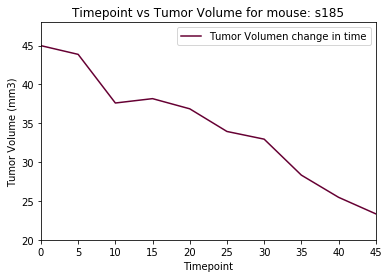

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#------ select all the mice use in capomulin drug test
cap_mouse = capomulin['Mouse ID'].drop_duplicates().tolist()

#------ cap_mouse -> returns 25 mice; 
#------ select a number between  0 an 24 to use a mouse in specific

mouse_plot = cap_mouse[0]

#------ Filter the information

cap_data = capomulin.loc[(capomulin['Mouse ID'] == mouse_plot)]

#----- create the x axis labels
x_axis = cap_data['Timepoint'].tolist()

#----- Plot the Time vs Tumor of the chosen mouse

cap_data.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)', kind = 'line',legend = False, 
              color = '#660033')

#----- Formatting the plot
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(x_axis)
plt.legend(['Tumor Volumen change in time'], loc = 'best')
plt.title(f'Timepoint vs Tumor Volume for mouse: {mouse_plot}')

bottom, top = plt.ylim()  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.ylim(bottom=20, top=48)     # set the ylim to bottom, top



plt.show()

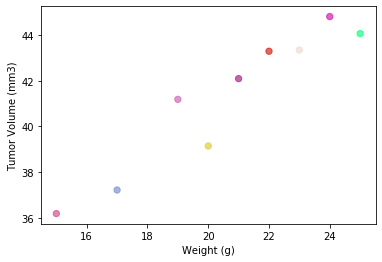

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Fixing random state for reproducibility

w_t = (pd.DataFrame(capomulin.groupby('Weight (g)')['Tumor Volume (mm3)'].mean())).reset_index()
X = w_t['Weight (g)']
w_t.plot('Weight (g)', 'Tumor Volume (mm3)', kind = 'scatter', s=40,
         c=np.random.rand(len(X),3), alpha = 0.65)
plt.show()


The r-squared is: 0.95


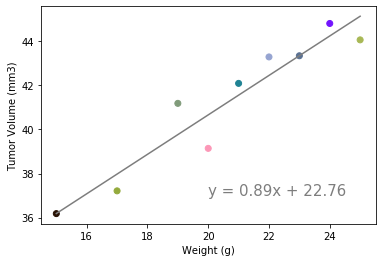

In [16]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
x_values =  w_t['Weight (g)']
y_values = w_t['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c=np.random.rand(len(X),3))
plt.plot(x_values,regress_values,"#7D7D7D")
plt.annotate(line_eq,(20,37),fontsize=15,color="#7D7D7D")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {round(rvalue,2)}")

